<a href="https://colab.research.google.com/github/pascale25/Uv4pOPaRDHZhHnKE/blob/master/Experiments_Happinesurvey_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Happy Customers survey 


# Buisiness problem

During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

## Goal(s)
Predict if a customer is happy or not based on the answers they give to questions asked

Identified important feature that make customer happy

## Success Metrics

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

Try to submit your working solution as soon as possible. The sooner the better.

# Data collection
We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#algorithms to use
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score, plot_confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve, precision_recall_fscore_support, accuracy_score
#for tuning the model
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
os.listdir("gdrive/MyDrive/Apziva_project/HFhD9gY6N8cN4PtO")

['ACME-HappinessSurvey2020.csv',
 'happinesurvey2020.csv',
 'Happinesurvey.ipynb',
 'Experiments_Happinesurvey_v2.ipynb',
 'Copy of Experiments_Happinesurvey_v2.ipynb',
 'experiemnts_of Happinesurvey.ipynb',
 'Untitled spreadsheet.gsheet',
 'accuracy.gsheet',
 'accuracy.csv',
 'exemple_notebook.gdoc',
 'Copy of Experiments_Happinesurvey_v3.ipynb',
 'Experiments_Happinesurvey_v3.ipynb']

# Get the Data 

In [ ]:
data = "gdrive/MyDrive/Apziva_project/HFhD9gY6N8cN4PtO/happinesurvey2020.csv"

In [ ]:
# read data 
df = pd.read_csv(data)
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [ ]:
df.shape

(126, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [ ]:
df.isna().sum()  # check for missing data

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [ ]:
# Renaming the columns for readibility
df.columns = ['Target','Delivered_on_Time', 'Contents_as_expected', 
              'Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease']

In [ ]:
df.nunique()

Target                    2
Delivered_on_Time         4
Contents_as_expected      5
Found_everything          5
Good_Price                5
Satisfied_with_courier    5
App_ease                  5
dtype: int64

In [ ]:
for col in df.columns:
  print(col, ":", df[col].unique())


Target : [0 1]
Delivered_on_Time : [3 5 4 1]
Contents_as_expected : [3 2 4 5 1]
Found_everything : [3 2 4 5 1]
Good_Price : [4 5 3 2 1]
Satisfied_with_courier : [2 4 3 5 1]
App_ease : [4 3 5 2 1]


# Exploratory Data Analysis

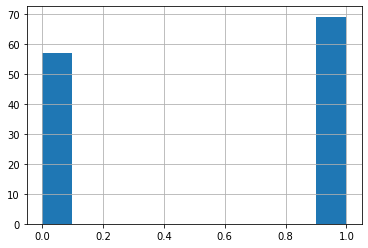

In [ ]:
df.Target.hist()

In [ ]:
df["Target"].value_counts()

1    69
0    57
Name: Target, dtype: int64

In [ ]:
Unhappy = (df['Target']==0).sum()/126 
Happy = (df['Target']==1).sum()/126
dif = Happy - Unhappy 
print(Unhappy*100, Happy*100, dif*100) 

45.23809523809524 54.761904761904766 9.523809523809529


There is a 9.52% difference between unhappy and happy customers.

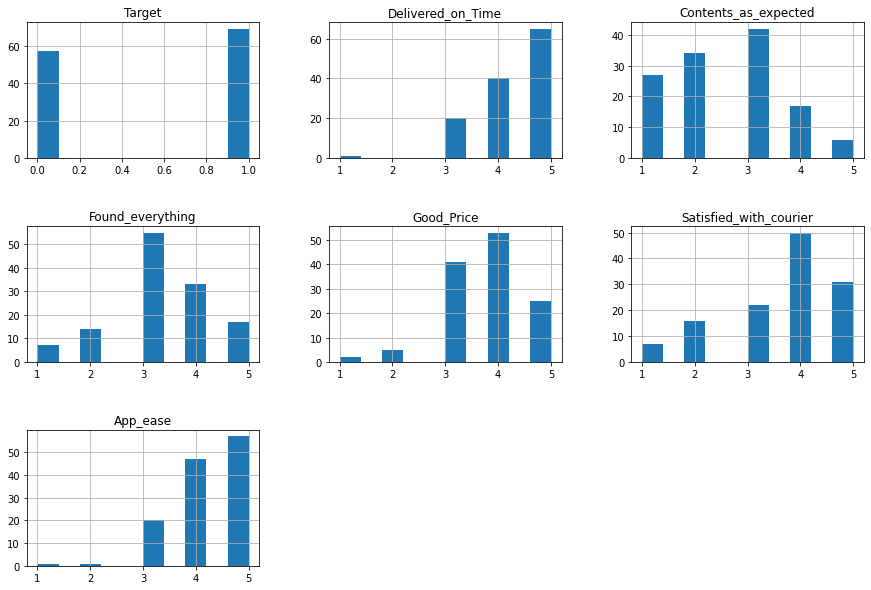

In [ ]:
#view the distribution of data 
df.hist(figsize=(15, 10) )
plt.subplots_adjust(hspace=0.5);

As expected, the variables could be considered as discrete or ordinal data, ranging from 1 to 5.

In general, the highest frequency was between 3 and 5, with the exception of the variable "the content of the order was expected" which had a high frequency value between 1 and 3.

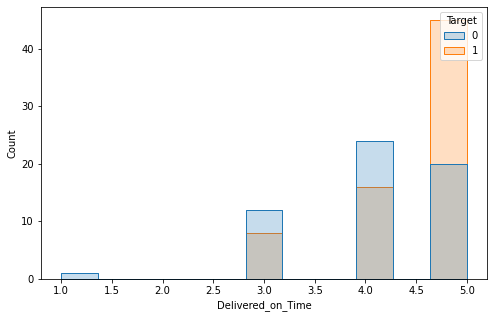

In [ ]:
plt.subplots(figsize=(8,5))
sns.histplot(df, x="Delivered_on_Time", hue="Target", element="step")

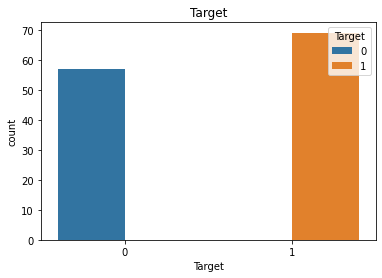

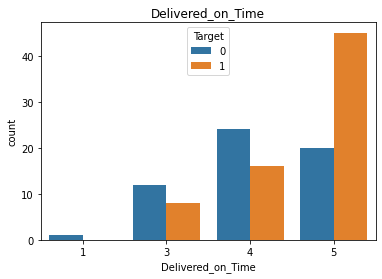

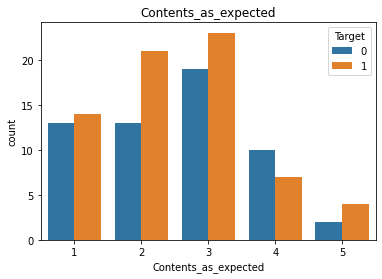

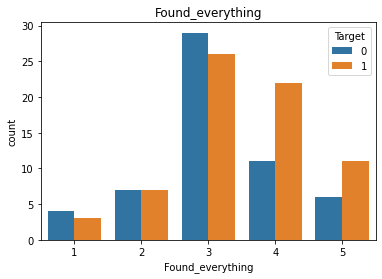

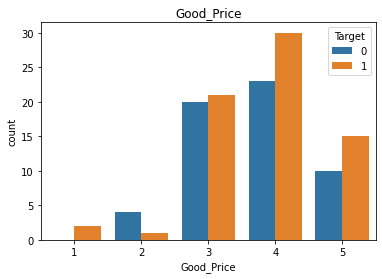

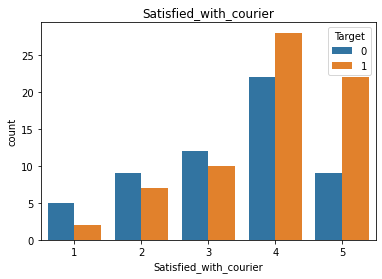

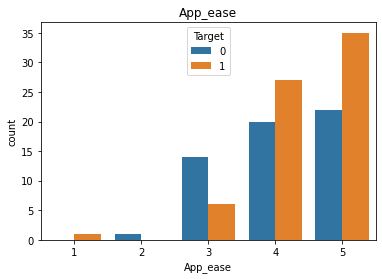

In [ ]:
# count frequency in each group
for col in df.columns:
  sns.countplot(x=col,data=df, hue=df['Target'])
  plt.title(col)
  plt.show()

In [ ]:
def plot_count_in_each_var(df,col,Target):
  data = df.groupby([col,Target]).size()
  data = data.reset_index(name = 'count')
  data = data.pivot(index = Target, columns = col, values = 'count')
  sns.heatmap(data , annot = True,  cmap = 'rocket_r');
  plt.xlabel(col, size = 12);
  plt.ylabel(Target, size = 12);
  plt.title (col, size = 14)
  plt.show()



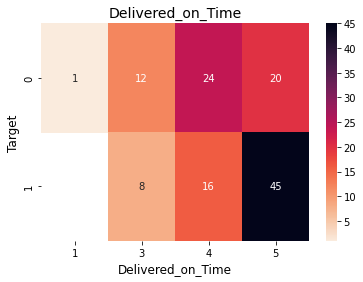

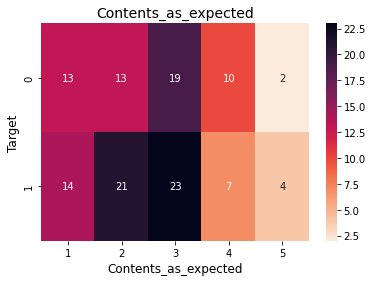

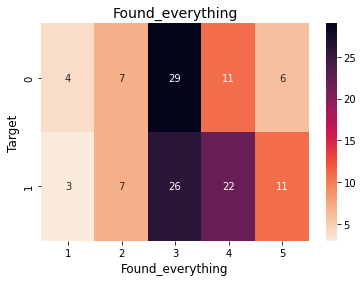

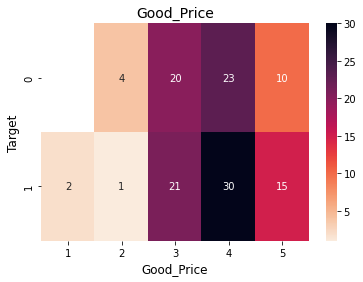

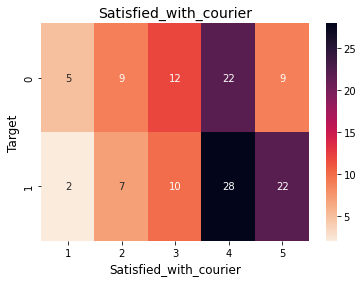

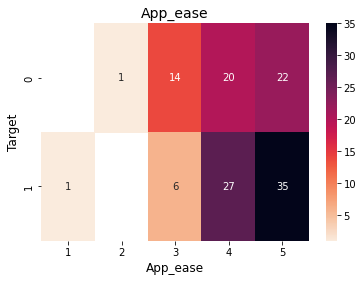

In [ ]:
for col in df.columns[1:7]: # exclude the first
  plot_count_in_each_var(df, col,'Target')

Here we wanted to see the distribution of responses across features and differentiate the type of customer (unhappy and happy customers).
We found that 

1. on-time delivery: happy customers tend to give a high score of 5 compared to unhappy customers.

2. content as expected: we found that both happy and unhappy customers give a high score between 2 and 3

3. everything was found: both customers give a score of 3.

4. good price: both customers give a high score of 4.

5.  Satisfied with the courier service. high score: 4 for both customers.

6. App_ease. Happy customers score 5 and unhappy customers score between 4 and 5. 


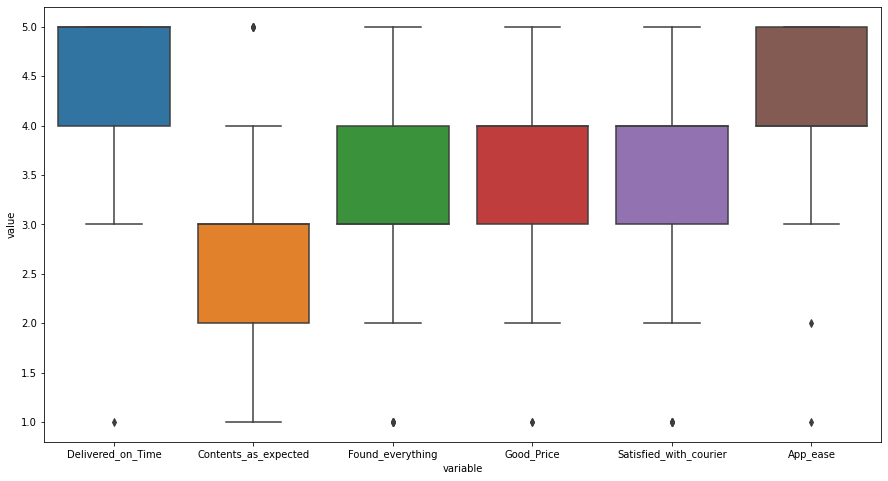

In [ ]:
# visualize outliers

plt.figure(figsize=(15, 8))
data_melted = pd.melt(df[['Delivered_on_Time', 'Contents_as_expected', 
              'Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease']])
sns.boxplot(x='variable', y='value', data=data_melted)

According to this boxplot, there are no aberrations. All features are between 1 and 5. There are no extreme values. 

however the boxplot reveals that delevered_on_time and App_ease received the highest score of all clients.

We found that we needed to pay attention to Content_as_expected features due to their low score. 

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

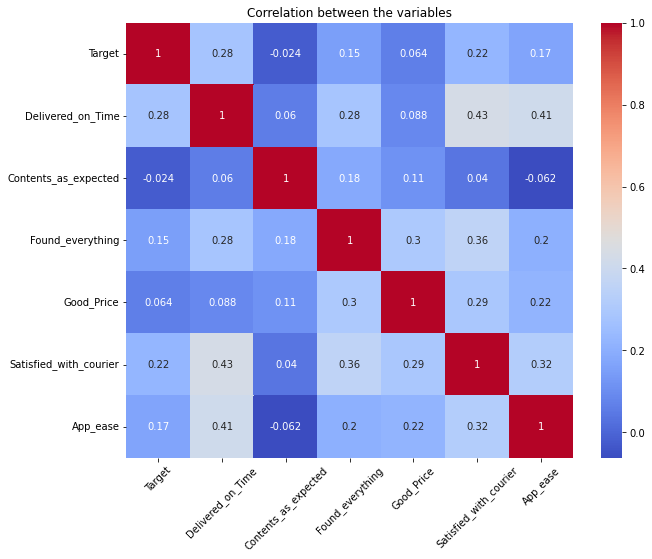

In [ ]:
# correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap="coolwarm")
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

From the headmap, there is no strong correlation between features and target.
However, we found that there is a weak correlation between satisfied_with_courier and delivered_ont_time, App_ease and delivered_ont_time of 0.43 and 0.41


# Statistical analysis : Chi_square or Pearson’s Chi-Square statistical hypothesis
## χ2 test of Independence
The Chi-square test is a non-parametric statistical test that enables us to understand the relationship between the categorical variables of the dataset. That is, it defines the correlation amongst the grouping categorical data.

Using the Chi-square test, we can estimate the level of correlation i.e. association between the categorical variables of the dataset. This helps us analyze the dependence of one category of the variable on the other independent category of the variable.


It is used to decide whether there is a relationship exists between two variables of a population.

H₀: The two categorical variables have no relationship

H₁: There is a relationship between two categorical variables



we apply the Chi_square or Pearson’s Chi-Square statistical hypothesis is a test for independence between categorical variables.

The Contingency Table : A Contingency table (also called crosstab) is used in statistics to summarize the relationship between several categorical variables

#### Define the null hypothesis and alternate hypothesis.

H₀ (Null Hypothesis) — the target features are independent to ohter variables 

H₁ (Alternate Hypothesis) — the target features are dependent to ohter variables 



In [ ]:
df.columns

Index(['Target', 'Delivered_on_Time', 'Contents_as_expected',
       'Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease'],
      dtype='object')

In [ ]:
df_crosstab = pd.crosstab(df['Target'],
                            df['Delivered_on_Time'],
                           margins=True, margins_name="Total")
df_crosstab

Delivered_on_Time,1,3,4,5,Total
Target,,,,,
0,1,12,24,20,57
1,0,8,16,45,69
Total,1,20,40,65,126


In [ ]:
import scipy.stats as stats
# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = df['Target'].unique()
columns = df['Delivered_on_Time'].unique()
for i in columns:
    for j in rows:
        O = df_crosstab[i][j]
        E = df_crosstab[i]['Total'] * df_crosstab['Total'][j] / df_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 11.981200492870975  and p value is: 0.007447837905122601
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 11.981200492870975  and critical value is: 7.814727903251179
Null Hypothesis is rejected.


In [ ]:
import pandas as pd
import scipy.stats as stats

def chi_square(df, alpha, col1, col2):
  # significance level
  alpha = alpha
  # crosstab
  df_crosstab = pd.crosstab(df[col1],
                            df[col2],
                           margins=True, margins_name="Total")
  # Calcualtion of Chisquare
  chi_square = 0
  rows = df[col1].unique()
  columns = df[col2].unique()
  for i in columns:
      for j in rows:
          O = df_crosstab[i][j]
          E = df_crosstab[i]['Total'] * df_crosstab['Total'][j] / df_crosstab['Total']['Total']
          chi_square += (O-E)**2/E

  # The p-value approach
  print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
  p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
  conclusion = "Failed to reject the null hypothesis."
  if p_value <= alpha:
      conclusion = "Null Hypothesis is rejected."
          
  print("chisquare-score is:", chi_square, " and p value is:", p_value)
  print(conclusion)
      
  # The critical value approach
  print("\n--------------------------------------------------------------------------------------")
  print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
  #Find the critical value for 95% confidence
  critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
  conclusion = "Failed to reject the null hypothesis."
  if chi_square > critical_value:
      conclusion = "Null Hypothesis is rejected."
          
  return print("chisquare-score is:", chi_square, " and critical value is:", critical_value, conclusion)

In [ ]:
df.columns

Index(['Target', 'Delivered_on_Time', 'Contents_as_expected',
       'Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease'],
      dtype='object')

In [ ]:
chi_square(df, 0.05, 'Target', 'Delivered_on_Time')

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 11.981200492870975  and p value is: 0.007447837905122601
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 11.981200492870975  and critical value is: 7.814727903251179 Null Hypothesis is rejected.


In [ ]:
chi_square(df, 0.05, 'Target', 'Contents_as_expected')

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 2.3751065643648768  and p value is: 0.6671305095864376
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 2.3751065643648768  and critical value is: 9.487729036781154 Failed to reject the null hypothesis.


In [ ]:
chi_square(df, 0.05, 'Target', 'Found_everything')

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 4.340258691369205  and p value is: 0.3619109993358314
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 4.340258691369205  and critical value is: 9.487729036781154 Failed to reject the null hypothesis.


In [ ]:
chi_square(df, 0.05, 'Target', 'Good_Price')

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 4.648222148039018  and p value is: 0.32533209688115616
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 4.648222148039018  and critical value is: 9.487729036781154 Failed to reject the null hypothesis.


In [ ]:
chi_square(df, 0.05, 'Target', 'Satisfied_with_courier')

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 6.8080391498956505  and p value is: 0.14638693674994785
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 6.8080391498956505  and critical value is: 9.487729036781154 Failed to reject the null hypothesis.


In [ ]:
chi_square(df, 0.05, 'Target', 'App_ease')

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 8.138426254545267  and p value is: 0.08663706753285116
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 8.138426254545267  and critical value is: 9.487729036781154 Failed to reject the null hypothesis.


#### Conclusion of the chi_squared test 

delivered_on_time: Ho rejected

Contents_as_expected: Ho accepted

Found_everything': Ho accepted

Good_Price: Ho accepted 

Satisfied_with_courier: Ho accepted 

App_ease : Ho accepted 

The null hypothesis was accepted in all features except one (delivered_on_time) where the null hypothesis was rejected. 

Customer dissatisfaction/satisfaction is independent of all variables except the delivery_on_time variable. 


#### 2nd Method

In [ ]:
from scipy.stats import chi2_contingency 

In [ ]:
categorical_col = df.columns[1:]
print(categorical_col)

Index(['Delivered_on_Time', 'Contents_as_expected', 'Found_everything',
       'Good_Price', 'Satisfied_with_courier', 'App_ease'],
      dtype='object')


In [ ]:
chisqt = pd.crosstab(df.Target, df.Good_Price, margins=True)
print(chisqt)

Good_Price  1  2   3   4   5  All
Target                           
0           0  4  20  23  10   57
1           2  1  21  30  15   69
All         2  5  41  53  25  126


In [ ]:
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(4.648222148039019, 0.325332096881156, 4)


In [ ]:
stat, p, dof = (chi2_contingency(value)[0:3])
 
print(stat, p, dof)

4.648222148039019 0.325332096881156 4


In [ ]:
significance_level = 0.05
print("p value: " + str(p)) 

if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS') 

p value: 0.325332096881156
ACCEPT NULL HYPOTHESIS


# Features Engineering 

Feature engineering allows you to create new features from existing ones. Here we have created 3 features: 

- get the mean of all scores

- get the sum of all scores 

- get the percentage of the overall scores

In [ ]:
df.nunique() , df.columns

(Target                    2
 Delivered_on_Time         4
 Contents_as_expected      5
 Found_everything          5
 Good_Price                5
 Satisfied_with_courier    5
 App_ease                  5
 dtype: int64, Index(['Target', 'Delivered_on_Time', 'Contents_as_expected',
        'Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease'],
       dtype='object'))

In [ ]:
total_exp_points = 30 
numbers_indp_var = 6

In [ ]:
df['percent_score'] = df[['Delivered_on_Time', 'Contents_as_expected','Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease']].sum(axis=1)/30*100
df['percent_score'].head(5)

0    63.333333
1    66.666667
2    73.333333
3    76.666667
4    76.666667
Name: percent_score, dtype: float64

In [ ]:
df['mean_score'] = df[['Delivered_on_Time', 'Contents_as_expected','Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease']].sum(axis=1)/6
df['mean_score'].head(5)

0    3.166667
1    3.333333
2    3.666667
3    3.833333
4    3.833333
Name: mean_score, dtype: float64

In [ ]:
df['total_score']= df[['Delivered_on_Time', 'Contents_as_expected','Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease']].sum(axis=1)
df['total_score'].head(5)

0    19
1    20
2    22
3    23
4    23
Name: total_score, dtype: int64

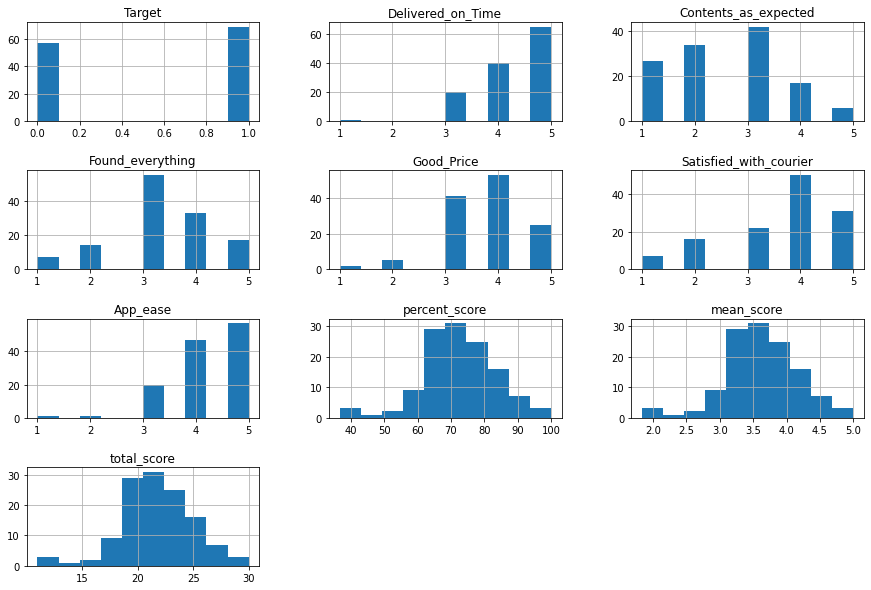

In [ ]:
#view the distribution of data 
df.hist(figsize=(15, 10) )
plt.subplots_adjust(hspace=0.5);

# Imbalanced Classification in Python: SMOTE


SMOTE stands for Synthetic Minority Oversampling Technique.
SMOTE is an improved method of dealing with imbalanced data in classification problems.
SMOTE is an intelligent alternative to oversampling: rather than creating duplicates of the minority class, it creates synthetic data points that are relatively similar to the original ones.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
df['Target'].value_counts()

1    69
0    57
Name: Target, dtype: int64

In [ ]:
y= df.Target
X= df.drop(columns = ['Target'])

we can define a SMOTE instance with default parameters that will balance the minority class and then fit and apply it in one step to create a transformed version of our dataset.

In [ ]:
# Oversample
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
counter = Counter(y_res)
print(counter)

Counter({0: 69, 1: 69})


In [ ]:
X_res.head(2)

,Delivered_on_Time,Contents_as_expected,Found_everything,Good_Price,Satisfied_with_courier,App_ease,percent_score,mean_score,total_score
0,3,3,3,4,2,4,63.333333,3.166667,19
1,3,2,3,5,4,3,66.666667,3.333333,20


# Data Preprocessing 

- Get Dummies features  for ordinal variables
- Obtain target and predictors
- Divide the data into training and test sets

In [ ]:
X_res[X_res.columns[0:6]] = X_res[X_res.columns[0:6]].applymap(str)
X_res.dtypes

Delivered_on_Time          object
Contents_as_expected       object
Found_everything           object
Good_Price                 object
Satisfied_with_courier     object
App_ease                   object
percent_score             float64
mean_score                float64
total_score                 int64
dtype: object

In [ ]:
X_res = pd.get_dummies(data=X_res, columns=['Delivered_on_Time', 'Contents_as_expected', 'Found_everything',
       'Good_Price', 'Satisfied_with_courier', 'App_ease'])
X_res.head()

,percent_score,mean_score,total_score,Delivered_on_Time_1,Delivered_on_Time_3,Delivered_on_Time_4,Delivered_on_Time_5,Contents_as_expected_1,Contents_as_expected_2,Contents_as_expected_3,...,Satisfied_with_courier_1,Satisfied_with_courier_2,Satisfied_with_courier_3,Satisfied_with_courier_4,Satisfied_with_courier_5,App_ease_1,App_ease_2,App_ease_3,App_ease_4,App_ease_5
0,63.333333,3.166667,19,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,66.666667,3.333333,20,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,73.333333,3.666667,22,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,76.666667,3.833333,23,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,76.666667,3.833333,23,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   percent_score             138 non-null    float64
 1   mean_score                138 non-null    float64
 2   total_score               138 non-null    int64  
 3   Delivered_on_Time_1       138 non-null    uint8  
 4   Delivered_on_Time_3       138 non-null    uint8  
 5   Delivered_on_Time_4       138 non-null    uint8  
 6   Delivered_on_Time_5       138 non-null    uint8  
 7   Contents_as_expected_1    138 non-null    uint8  
 8   Contents_as_expected_2    138 non-null    uint8  
 9   Contents_as_expected_3    138 non-null    uint8  
 10  Contents_as_expected_4    138 non-null    uint8  
 11  Contents_as_expected_5    138 non-null    uint8  
 12  Found_everything_1        138 non-null    uint8  
 13  Found_everything_2        138 non-null    uint8  
 14  Found_ever

In [ ]:
# split the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=47)

# Modelling

- build the model 
- evaluate the model
- tune the model 
- select the best model 

#### Track Model Accuracy

In [ ]:
accuracy_dic = {}

In [ ]:
accuracy_dic

{}

### Decision Tree

In [ ]:
#building decision tree
dt = DecisionTreeClassifier(random_state=47)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
target_names = ['No_happy', 'happy']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No_happy       0.71      0.79      0.75        19
       happy       0.71      0.62      0.67        16

    accuracy                           0.71        35
   macro avg       0.71      0.71      0.71        35
weighted avg       0.71      0.71      0.71        35



In [ ]:
accuracy = accuracy_score(y_test,y_pred) #predictions
accuracy_dic['DecisionTreeClassifier_dt'] = accuracy
accuracy

0.7142857142857143

### Random forest

In [ ]:
#rf_clf0= RandomForestClassifier(class_weight={0:0.452,1:0.548}, random_state=47)
rf_clf0= RandomForestClassifier(random_state=47)
rf_clf0.fit(X_train, y_train)

RandomForestClassifier(random_state=47)

In [ ]:
y_pred = rf_clf0.predict(X_test)
target_names = ['No_happy', 'happy']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No_happy       0.65      0.79      0.71        19
       happy       0.67      0.50      0.57        16

    accuracy                           0.66        35
   macro avg       0.66      0.64      0.64        35
weighted avg       0.66      0.66      0.65        35



In [ ]:
accuracy = accuracy_score(y_test,y_pred) #predictions
accuracy_dic['RandomForestClassifier_rf_clf0'] = accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 65.71%


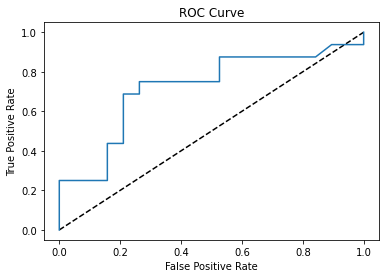

In [ ]:
y_pred_prob = rf_clf0.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.71875


In [ ]:
float(round((roc_auc_score(y_test, y_pred_prob)), 2))

0.72

In [ ]:
# Compute cross-validated AUC scores: cv_auc
cv_rf = cross_val_score(rf_clf0, X_train, y_train, cv = 5, scoring = 'accuracy')
print(cv_rf)
print('__________________________________________________________')
print(cv_rf.mean())

[0.66666667 0.57142857 0.61904762 0.5        0.7       ]
__________________________________________________________
0.6114285714285714


### Random Forest two rf_clf1 with Hyperparameter tunning 

In [ ]:
# define hyperparams
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [2,4,6,8, 10]
min_samples_split = [2,3, 4, 5]
min_samples_leaf = [1,2, 3]
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 14, 19, 24, 28, 33, 38, 43, 47, 52, 57, 62, 66, 71, 76, 81, 85, 90, 95, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3], 'bootstrap': [True, False]}


In [ ]:
rf_clf1 = RandomForestClassifier(random_state= 47)
# n_jobs -1, all CPUs are used.
rf_RandomGrid = RandomizedSearchCV(estimator = rf_clf1, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = -1, random_state=47)

In [ ]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=47),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [10, 14, 19, 24, 28, 33,
                                                         38, 43, 47, 52, 57, 62,
                                                         66, 71, 76, 81, 85, 90,
                                                         95, 100]},
                   random_state=47, verbose=2)

In [ ]:
rf_RandomGrid.best_params_

{'n_estimators': 38,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [ ]:
rf_clf1 = rf_RandomGrid.best_estimator_
y_pred = rf_clf1.predict(X_test)
target_names = ['No_happy', 'happy']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No_happy       0.71      0.79      0.75        19
       happy       0.71      0.62      0.67        16

    accuracy                           0.71        35
   macro avg       0.71      0.71      0.71        35
weighted avg       0.71      0.71      0.71        35



In [ ]:
accuracy = accuracy_score(y_test,y_pred) #predictions
accuracy_dic['Tune_RandomForestClassifier_rf_clf1'] = accuracy
accuracy

0.7142857142857143

[[15  4]
 [ 6 10]]


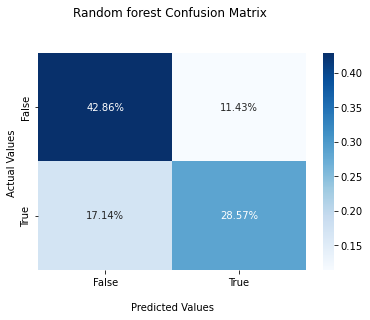

In [ ]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
# plot the comfusion matrix
ax=sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
ax.set_title('Random forest Confusion Matrix \n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

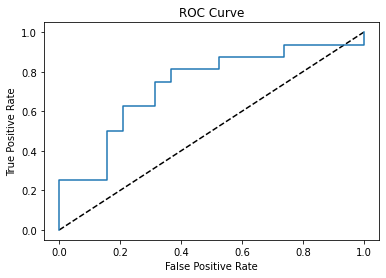

In [ ]:
y_pred_prob = rf_clf1.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.7302631578947368


In [ ]:
# Compute cross-validated AUC scores: cv_auc
cv_rf = cross_val_score(rf_clf1, X_train, y_train, cv = 5, scoring = 'accuracy')
print(cv_rf)
print(cv_rf.mean())

[0.61904762 0.61904762 0.66666667 0.6        0.75      ]
0.650952380952381


Text(0.5, 1.0, 'Random forest Feature importances ')

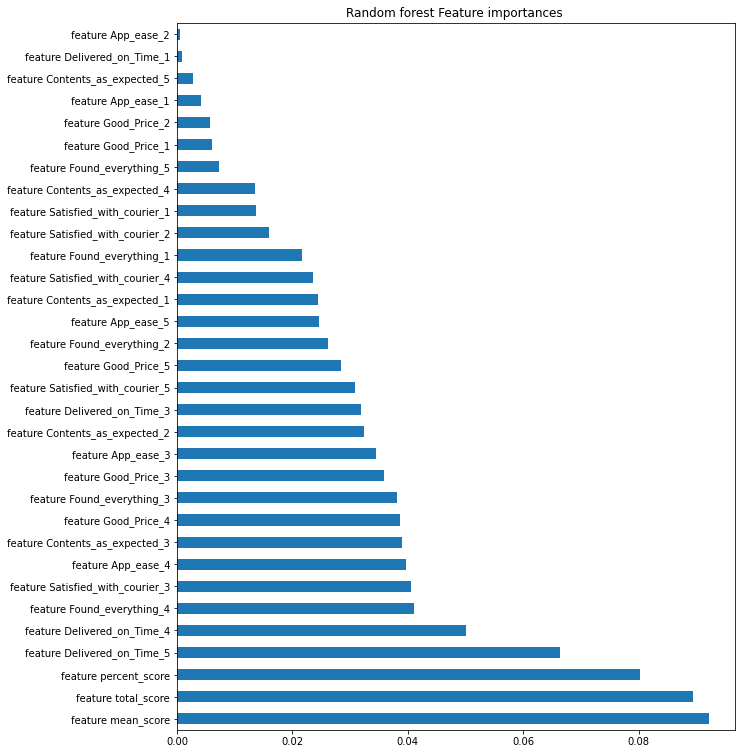

In [ ]:
plt.figure(figsize=(10, 13))
feat_importance = rf_clf1.feature_importances_
feature_names = [f"feature {i}" for i in X_train.columns]
forest_importances = pd.Series(feat_importance, index=feature_names).sort_values(ascending=False)
forest_importances.plot.barh()
plt.title("Random forest Feature importances ")

### XGBoost 

In [ ]:
# XGBOOST Model - 1rst model 
XGB = XGBClassifier(n_estimators=1000,learning_rate=0.05)
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
accuracy = accuracy_score(y_test,y_pred) #predictions
accuracy_dic['XGBoost_XGB'] = accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.29%


In [ ]:
target_names = ['No_Happy', 'happy']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No_Happy       0.75      0.79      0.77        19
       happy       0.73      0.69      0.71        16

    accuracy                           0.74        35
   macro avg       0.74      0.74      0.74        35
weighted avg       0.74      0.74      0.74        35



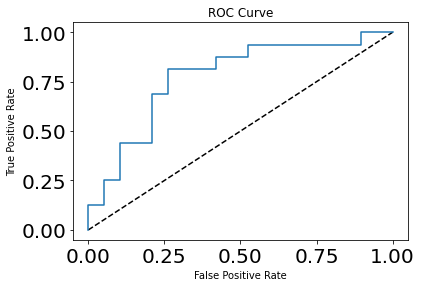

In [ ]:
y_pred_prob = XGB.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.7730263157894737


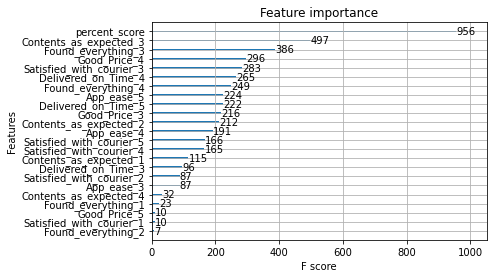

In [ ]:

plot_importance(XGB.fit(X_train, y_train))

In [ ]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[15  4]
 [ 5 11]]


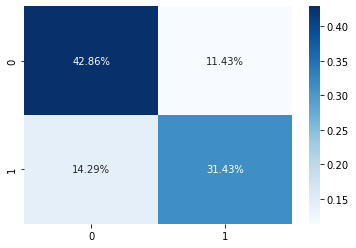

In [ ]:
ax=sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

### XGBoost Two

In [ ]:
xgb_param_dict = {
    'learning_rate':[0.06, 0.05, 0.10, 0.15, 0.20, 0.001],
    'max_depth':range(1,10,2),
    'min_child_weight':range(1,10,2),
    'gamma':[ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'colsample_bytree':[ 0.3, 0.4, 0.5 , 0.7 ]
    
}
xgb_classifier = XGBClassifier() # (n_estimators=1000)

xgb2 = GridSearchCV(xgb_classifier, 
                    param_grid=xgb_param_dict,
                    cv=10,
                    verbose=1,
                    n_jobs=-1)

xgb2.fit(X_train, y_train)

Fitting 10 folds for each of 3000 candidates, totalling 30000 fits


GridSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.06, 0.05, 0.1, 0.15, 0.2, 0.001],
                         'max_depth': range(1, 10, 2),
                         'min_child_weight': range(1, 10, 2)},
             verbose=1)

In [ ]:
xgb2.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.0,
 'learning_rate': 0.001,
 'max_depth': 1,
 'min_child_weight': 7}

In [ ]:
xgb2_estimator = xgb2.best_estimator_
y_pred_ = xgb2_estimator.predict(X_test)
accuracy = accuracy_score(y_test,y_pred) 
accuracy_dic['Tune_XGBoost_xgb2'] = accuracy

In [ ]:
target_names = ['Happy', 'No_happy']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Happy       0.75      0.79      0.77        19
    No_happy       0.73      0.69      0.71        16

    accuracy                           0.74        35
   macro avg       0.74      0.74      0.74        35
weighted avg       0.74      0.74      0.74        35



### Bernoulli Naïve Bayes Classifier
#### Attributes
-	 class_log_prior_ − array, shape(n_classes,): It provides the smoothed log probability for every class.
- class_count_ − array, shape(n_classes,) : It provides the actual number of training samples encountered for each class.
- 	feature_log_prob_ − array, shape (n_classes, n_features): It gives the empirical log probability of features given a class  P(features⏐Y)
- feature_count_ − array, shape (n_classes, n_features): It provides the actual number of training samples encountered for each (class,feature

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNBclf = BernoulliNB()
BNBclf.fit(X_train, y_train)

BernoulliNB()

In [ ]:
y_pred = BNBclf.predict(X_test)
target_names = ['No_happy', 'happy']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No_happy       0.67      0.63      0.65        19
       happy       0.59      0.62      0.61        16

    accuracy                           0.63        35
   macro avg       0.63      0.63      0.63        35
weighted avg       0.63      0.63      0.63        35



In [ ]:
accuracy = accuracy_score(y_test,y_pred) #predictions
accuracy_dic['BernoulliNB_BNBclf'] = accuracy

### PassiveAggressiveClassifier
How Passive-Aggressive Algorithms Work:
Passive-Aggressive algorithms are called so because :

Passive: If the prediction is correct, keep the model and do not make any changes. i.e., the data in the example is not enough to cause any changes in the model. 

Aggressive: If the prediction is incorrect, make changes to the model. i.e., some change to the model may correct it.
- parameters
- C : This is the regularization parameter, and denotes the penalization the model will make on an incorrect prediction
- max_iter : The maximum number of iterations the model makes over the training data.
- tol : The stopping criterion. If it is set to None, the model will stop when (loss > previous_loss  –  tol). By default, it is set to 1e-3.

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
pac = PassiveAggressiveClassifier(C=0.5, max_iter=1000, random_state=47, tol=1e-3)
pac.fit(X_train, y_train)

PassiveAggressiveClassifier(C=0.5, random_state=47)

In [ ]:
y_pred = pac.predict(X_test)
accuracy = accuracy_score(y_test,y_pred) #predictions
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 54.29%


In [ ]:
y_pred = pac.predict(X_test)
target_names = ['No_happy', 'happy']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No_happy       0.54      1.00      0.70        19
       happy       0.00      0.00      0.00        16

    accuracy                           0.54        35
   macro avg       0.27      0.50      0.35        35
weighted avg       0.29      0.54      0.38        35



In [ ]:
accuracy = accuracy_score(y_test,y_pred) #predictions
accuracy_dic['PassiveAggressiveClassifier_pac'] = accuracy

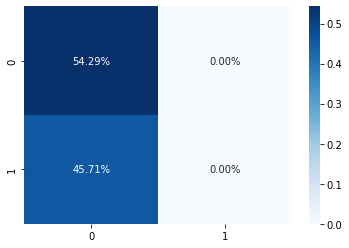

In [ ]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

### Hyperopt
Hyperopt is a powerful python library for hyperparameter optimization developed by James Bergstra. Hyperopt uses a form of Bayesian optimization for parameter tuning that allows you to get the best parameters for a given model. It can optimize a model with hundreds of parameters on a large scale.

Setting Up Hyperopt

Objective Function | This should return the value we want to minimise during the computation. In our case, it's the ‘accuracy_score’ function.

Search Space | This defines the range of values a given hyperparameter can take. This can be integers, floats or strings as we shall see later in the article.

Tuning Algorithm | In Hyperopt, there are two main hyperparameter search algorithms: Random Search and Tree of Parzen Estimators (Bayesian). In this example, we will be using the latter as it is known to produce the best results.

Evaluations | This refers to the number of different hyperparameter instances to train the model over. This is recommended to be between 10–30 times the number of hyperparameters defined in the search space to optimise for performance and computation time.

In [ ]:
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

import warnings
warnings.filterwarnings("ignore")

#####  HyperOpt with Random Forest 

In [ ]:
#Define Parameter Space for Optimization
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]),
    "max_depth": hp.quniform("max_depth", 1, 15,1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
}

In [ ]:
# define objective function
#cross-validation to avoid overfitting and then the function will return a loss values and its status
#Remember that hyperopic minimizes the function, that why I add a negative sign in the acc 
def hyperparameter_tuning(params):
    clf = RandomForestClassifier(**params, n_jobs=-1)
    acc = cross_val_score(clf, X_train, y_train,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

In [ ]:
#Fine Tune the Mode
# Initialize trials object
trials = Trials()

best = fmin(fn =hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials)

print("Best: {}".format(best))

100%|██████████| 100/100 [04:38<00:00,  2.79s/it, best loss: -0.6585714285714286]
Best: {'criterion': 0, 'max_depth': 1.0, 'n_estimators': 4}


In [ ]:
print(best)# best_params

{'criterion': 0, 'max_depth': 1.0, 'n_estimators': 4}


In [ ]:
  # new search space
search_space={'n_estimators':hp.randint('n_estimators',100,500),
              'max_depth': hp.randint('max_depth',10,50),           
              'min_samples_split':hp.uniform('min_samples_split',0,1),   
              'min_samples_leaf':hp.randint('min_samples_leaf',1,10),
              'criterion':hp.choice('criterion', ['gini','entropy']),
              'max_features':hp.choice('max_features',['sqrt', 'log2']) }

In [ ]:
# redefine the function usng a wider range of hyperparameters
def hyperparameter_tuning2(search_space):
    model = RandomForestClassifier(search_space, random_state=47)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

In [ ]:
## set the hyperparam tuning algorithm
algorithm=tpe.suggest
# implement Hyperopt
trials2 = Trials()
#best_params = fmin(fn=hyperparameter_tuning2, space=search_space, algo=algorithm, max_evals=100, trials=trials2)

##### HyperOpt wiht XGBoost

In [ ]:
space={'max_depth': hp.quniform("max_depth", 1, 18, 1),
       'learning_rate':hp.uniform('learning_rate', 0, 1),
        'gamma': hp.uniform ('gamma', 0,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,100,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.2,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 1000,
        'seed': 0
    }

In [ ]:
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'], learning_rate = int(space['learning_rate']),
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    #print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

100%|██████████| 100/100 [00:03<00:00, 28.82it/s, best loss: -0.5428571428571428]


In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.6300360931939932, 'gamma': 5.686826275615873, 'learning_rate': 0.9151901448162824, 'max_depth': 12.0, 'min_child_weight': 10.0, 'reg_alpha': 98.0, 'reg_lambda': 0.5952698171321049}


 I have experimented using HyperOpt to tune hyperparameters in Random Forest and Gradient Boost.

the params selected by HyperOpt did not improve the accuracy of the model.

In [ ]:
#Analyze results by using trials object
# shows a list of dictionaries returned by ‘objective’ during the search.
#trials.results 
# shows a list of losses (float for each ‘ok’ trial).
#trials.losses() 
# shows a list of status strings.
#trials.statuses() 

# Model Selection 

In [ ]:
accuracy_dic

{'DecisionTreeClassifier_dt': 0.7142857142857143,
 'RandomForestClassifier_rf_clf0': 0.6571428571428571,
 'Tune_RandomForestClassifier_rf_clf1': 0.7142857142857143,
 'XGBoost_XGB': 0.7428571428571429,
 'Tune_XGBoost_xgb2': 0.7428571428571429,
 'BernoulliNB_BNBclf': 0.6285714285714286,
 'PassiveAggressiveClassifier_pac': 0.5428571428571428}

In [ ]:
df_acc = pd.DataFrame(list(accuracy_dic.items()), columns=['Model', 'Accuracy'])
df_acc.sort_values(by='Accuracy', inplace=True)
df_acc

,Model,Accuracy
6,PassiveAggressiveClassifier_pac,0.542857
5,BernoulliNB_BNBclf,0.628571
1,RandomForestClassifier_rf_clf0,0.657143
0,DecisionTreeClassifier_dt,0.714286
2,Tune_RandomForestClassifier_rf_clf1,0.714286
3,XGBoost_XGB,0.742857
4,Tune_XGBoost_xgb2,0.742857


In [ ]:
data

'gdrive/MyDrive/Apziva_project/HFhD9gY6N8cN4PtO/happinesurvey2020.csv'

In [ ]:
df_acc.to_csv('/content/gdrive/MyDrive//Apziva_project/HFhD9gY6N8cN4PtO/accuracy.csv')

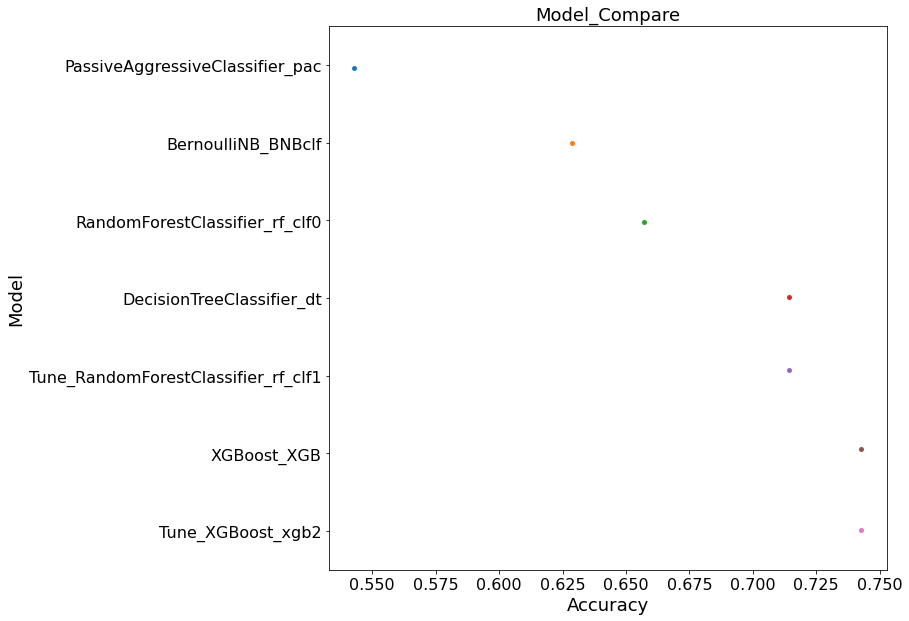

In [ ]:
plt.figure(figsize=(10, 10))
sns.stripplot(df_acc.Accuracy, df_acc.Model);
plt.xlabel('Accuracy', fontsize=18)
plt.ylabel('Model', fontsize=18)
plt.title('Model_Compare', fontsize=18)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=20)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=20)
plt.show()

# Conclusion
Supervised machine learning classification algorithms were developed to predict customer state (happy or not happy).
The EDA did not show any clear pattern among features.
however, we found that We needed to pay attention to Content_as_expected feature due to their low score.  Delevered_on_time and App_ease tend to receive the highest score of all clients.

Chi_squared test reveal that the null hypothesis was accepted in all features except one (delivered_on_time) where the null hypothesis was rejected.  Thus, Customer dissatisfaction/satisfaction is independent of all variables except the delivery_on_time variable.

mean of all scores, sum of all scores and   percentage of the overall scores were news features created. 

We used SMOTE technique to balance the dataset (69, 69)
 we performed 8 models, the best one was XGBoost  with an accuracy of 0.74 and AUC was 0.77

the feature of importance reveals  that percentage of the overall scores was the most important, followed by "contents_as_expected" score 3, "found_everything" score 3, and "good_price" score 4. 


# modularize code

In [ ]:
os.listdir("gdrive/MyDrive/Apziva_project/HFhD9gY6N8cN4PtO")

['ACME-HappinessSurvey2020.csv',
 'happinesurvey2020.csv',
 'Happinesurvey.ipynb',
 'Experiments_Happinesurvey_v2.ipynb',
 'Copy of Experiments_Happinesurvey_v2.ipynb',
 'experiemnts_of Happinesurvey.ipynb',
 'Untitled spreadsheet.gsheet',
 'accuracy.gsheet',
 'accuracy.csv',
 'exemple_notebook.gdoc',
 'Copy of Experiments_Happinesurvey_v3.ipynb',
 'Experiments_Happinesurvey_v3.ipynb',
 'Hyperparameter-Optimization-Techniques-master',
 'modular',
 'going_modular']

In [ ]:
import os

os.makedirs("gdrive/MyDrive/Apziva_project/HFhD9gY6N8cN4PtO/going_modular", exist_ok=True)

In [ ]:
%%writefile data_setup.py

"""
Contains functionality for read the data.

"""

# get the data 
def Read_data(data):
  df = pd.read_csv(data)
  df.columns = ['Target','Delivered_on_Time', 'Contents_as_expected', 
              'Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease']
  return df

Writing data_setup.py


In [ ]:
 Read_data(data).head(2)

,Target,Delivered_on_Time,Contents_as_expected,Found_everything,Good_Price,Satisfied_with_courier,App_ease
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3


In [ ]:
%%writefile chi_square_test.py

"""
Contains functionality for chi_square test

"""


def chi_square(df, alpha, col1, col2):
  import pandas as pd
  import scipy.stats as stats
  # significance level
  alpha = alpha
  # crosstab
  df_crosstab = pd.crosstab(df[col1],
                            df[col2],
                           margins=True, margins_name="Total")
  # Calcualtion of Chisquare
  chi_square = 0
  rows = df[col1].unique()
  columns = df[col2].unique()
  for i in columns:
      for j in rows:
          O = df_crosstab[i][j]
          E = df_crosstab[i]['Total'] * df_crosstab['Total'][j] / df_crosstab['Total']['Total']
          chi_square += (O-E)**2/E

  # The p-value approach
  print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
  p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
  conclusion = "Failed to reject the null hypothesis."
  if p_value <= alpha:
      conclusion = "Null Hypothesis is rejected."
          
  print("chisquare-score is:", chi_square, " and p value is:", p_value)
  print(conclusion)
      
  # The critical value approach
  print("\n--------------------------------------------------------------------------------------")
  print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
  #Find the critical value for 95% confidence
  critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
  conclusion = "Failed to reject the null hypothesis."
  if chi_square > critical_value:
      conclusion = "Null Hypothesis is rejected."
          
  return print("chisquare-score is:", chi_square, " and critical value is:", critical_value, conclusion)

Writing chi_square_test.py


In [ ]:
chi_square(df, 0.05 , 'Target', 'Delivered_on_Time')

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 11.981200492870975  and p value is: 0.007447837905122601
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 11.981200492870975  and critical value is: 7.814727903251179 Null Hypothesis is rejected.


In [ ]:
def features_Engineering(df):
  df['percent_score'] = df[['Delivered_on_Time', 'Contents_as_expected','Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease']].sum(axis=1)/30*100
  df['mean_score'] = df[['Delivered_on_Time', 'Contents_as_expected','Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease']].sum(axis=1)/6
  df['total_score']= df[['Delivered_on_Time', 'Contents_as_expected','Found_everything', 'Good_Price', 'Satisfied_with_courier', 'App_ease']].sum(axis=1)
  return df

In [ ]:
features_Engineering(df).head(2)

,Target,Delivered_on_Time,Contents_as_expected,Found_everything,Good_Price,Satisfied_with_courier,App_ease,percent_score,mean_score,total_score
0,0,3,3,3,4,2,4,63.333333,3.166667,19
1,0,3,2,3,5,4,3,66.666667,3.333333,20


In [ ]:
def balance_dataset(df):
  from imblearn.over_sampling import SMOTE
  y= df.Target
  X= df.drop(columns = ['Target'])
  # Oversample
  sm = SMOTE(random_state=42)
  X_res, y_res = sm.fit_resample(X, y)
  return X_res, y_res

In [ ]:
X_res, y_res = balance_dataset(df)

In [ ]:
def dummie_features(X_res):
  # only the inde
  # get all features , convert to string and get dummie features
  X_res[X_res.columns[0:6]] = X_res[X_res.columns[0:6]].applymap(str)
  X_res = pd.get_dummies(data=X_res, columns=['Delivered_on_Time', 'Contents_as_expected', 'Found_everything',
       'Good_Price', 'Satisfied_with_courier', 'App_ease'])
  return X_res

In [ ]:
X_res = dummie_features(X_res)

In [ ]:
def split_data(X_res, y_res):
  # split the data into train and test set 
  X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=47)
  accuracy_dic = {}
  return  X_train, X_test, y_train, y_test, accuracy_dic

In [ ]:
X_train, X_test, y_train, y_test, accuracy_dic = split_data(X_res, y_res)

In [ ]:
def modeling(model):
  #accuracy_dic = {}
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)  
  target_names = ['Unhappy', 'happy']
  report = classification_report(y_test, y_pred, target_names=target_names)
  accuracy = accuracy_score(y_test,y_pred) #predictions
  accuracy_dic[model] = float(round(accuracy, 2))
  cross_val = (cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')).mean()
  return cross_val, accuracy, print(report), y_pred

In [ ]:
#all model
dt = DecisionTreeClassifier(random_state=47)
rf_clf0= RandomForestClassifier(random_state=47)
XGB = XGBClassifier(n_estimators=1000,learning_rate=0.05)
BNBclf = BernoulliNB()
pac = PassiveAggressiveClassifier(C=0.5, max_iter=1000, random_state=47, tol=1e-3)

In [ ]:
modeling(dt)

              precision    recall  f1-score   support

     Unhappy       0.71      0.79      0.75        19
       happy       0.71      0.62      0.67        16

    accuracy                           0.71        35
   macro avg       0.71      0.71      0.71        35
weighted avg       0.71      0.71      0.71        35



(0.6333333333333334,
 0.7142857142857143,
 None,
 array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0]))

In [ ]:
modeling(rf_clf0)

              precision    recall  f1-score   support

     Unhappy       0.65      0.79      0.71        19
       happy       0.67      0.50      0.57        16

    accuracy                           0.66        35
   macro avg       0.66      0.64      0.64        35
weighted avg       0.66      0.66      0.65        35



(0.6114285714285714,
 0.6571428571428571,
 None,
 array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]))

In [ ]:
modeling(XGB)

              precision    recall  f1-score   support

     Unhappy       0.75      0.79      0.77        19
       happy       0.73      0.69      0.71        16

    accuracy                           0.74        35
   macro avg       0.74      0.74      0.74        35
weighted avg       0.74      0.74      0.74        35



(0.631904761904762,
 0.7428571428571429,
 None,
 array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1]))

In [ ]:
modeling(BNBclf)

              precision    recall  f1-score   support

     Unhappy       0.67      0.63      0.65        19
       happy       0.59      0.62      0.61        16

    accuracy                           0.63        35
   macro avg       0.63      0.63      0.63        35
weighted avg       0.63      0.63      0.63        35



(0.6395238095238095,
 0.6285714285714286,
 None,
 array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0]))

In [ ]:
modeling(pac)

              precision    recall  f1-score   support

     Unhappy       0.54      1.00      0.70        19
       happy       0.00      0.00      0.00        16

    accuracy                           0.54        35
   macro avg       0.27      0.50      0.35        35
weighted avg       0.29      0.54      0.38        35



(0.49523809523809526,
 0.5428571428571428,
 None,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
accuracy_dic

{DecisionTreeClassifier(random_state=47): 0.71,
 RandomForestClassifier(random_state=47): 0.66,
 XGBClassifier(learning_rate=0.05, n_estimators=1000): 0.74,
 BernoulliNB(): 0.63,
 PassiveAggressiveClassifier(C=0.5, random_state=47): 0.54}

In [ ]:
def model_tune(model, param_grid):
   #accuracy_dic = {}
  RandomGrid_search = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = -1, random_state=47)
  RandomGrid_search.fit(X_train, y_train)
  model_tune = RandomGrid_search.best_estimator_
  y_pred = model_tune.predict(X_test)  
  target_names = ['Unhappy', 'happy']
  report = classification_report(y_test, y_pred, target_names=target_names)
  accuracy = accuracy_score(y_test,y_pred) #predictions
  accuracy_dic[model_tune] = float(round(accuracy, 2))
  best_params = RandomGrid_search.best_params_
  return best_params, accuracy, print(report), y_pred

In [ ]:
#tune model
# define hyperparams
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [2,4,6,8, 10]
min_samples_split = [2,3, 4, 5]
min_samples_leaf = [1,2, 3]
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)
rf_clf1 = RandomForestClassifier(random_state= 47)

{'n_estimators': [10, 14, 19, 24, 28, 33, 38, 43, 47, 52, 57, 62, 66, 71, 76, 81, 85, 90, 95, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3], 'bootstrap': [True, False]}


In [ ]:
model_tune(rf_clf1, param_grid)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
              precision    recall  f1-score   support

     Unhappy       0.71      0.79      0.75        19
       happy       0.71      0.62      0.67        16

    accuracy                           0.71        35
   macro avg       0.71      0.71      0.71        35
weighted avg       0.71      0.71      0.71        35



({'n_estimators': 38,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'auto',
  'max_depth': 10,
  'bootstrap': True},
 0.7142857142857143,
 None,
 array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]))

# Save best model object

In [ ]:
!ls /content/gdrive//MyDrive/Apziva_project/HFhD9gY6N8cN4PtO

 accuracy.csv
 accuracy.gsheet
 ACME-HappinessSurvey2020.csv
'Copy of Experiments_Happinesurvey_v2.ipynb'
'Copy of Experiments_Happinesurvey_v3.ipynb'
 exemple_notebook.gdoc
'experiemnts_of Happinesurvey.ipynb'
 Experiments_Happinesurvey_v2.ipynb
 Experiments_Happinesurvey_v3.ipynb
 going_modular
 happinesurvey2020.csv
 Happinesurvey.ipynb
 Hyperparameter-Optimization-Techniques-master
 modular
'Untitled spreadsheet.gsheet'


In [ ]:
xgb2_estimator

XGBClassifier(colsample_bytree=0.3, gamma=0.0, learning_rate=0.001, max_depth=1,
              min_child_weight=7)

In [ ]:
#import pickle
  
# Save the trained model as a pickle string.
#saved_XGB = pickle.dumps(xgb2_estimator)
  
# Load the pickled model
#XBG_from_pickle = pickle.loads(saved_XGB)

# Use the loaded pickled model to make predictions
#XGB_from_pickle.predict(X_test)

In [ ]:
import pickle

from joblib import Parallel, delayed
import joblib
  
  
# Save the model as a pickle in a file
joblib.dump(xgb2_estimator, 'filename.pkl')
  
# Load the model from the file
XGB_from_joblib = joblib.load('filename.pkl')
  
# Use the loaded model to make predictions
XGB_from_joblib.predict(X_test)

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
XGB_from_joblib

XGBClassifier(colsample_bytree=0.3, gamma=0.0, learning_rate=0.001, max_depth=1,
              min_child_weight=7, missing=nan)

In [ ]:
y_pred = XGB_from_joblib.predict(X_test)
accuracy = accuracy_score(y_test,y_pred) 
accuracy


0.6571428571428571